Edited by Mohamed Sayed on 27/11/2019. All errors are now my own.
# Practical 7 - Part 1A

The aim of part 1A is to calculate the homography that best maps two sets of points to one another.  We will (eventually) use this for creating panoramas, and for calculating the 3D pose of planes.  You should use this
template for your code and fill in the missing sections marked "TO DO"


## Import libraries 

In [145]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

## Test case formulation

To start with, let's set up some start points `pts1Cart` and a homography, `H`, that we can use to generate target points `pts2Cart`. We'll also add some noise to `pts2Cart` to simulate a real world environment. The challenge is to find the same homography, or as close as noise allows, given `pts1Cart` and `pts2Cart`.

__NOTE:__ It may be helpful to set `noiseLevel` to 0 to start with so that you can check if your solution is spot on while debugging. Make sure you set it back to some value, here we use 4, when you're confident your solution works.

In [146]:
# Define a set of two-dimensional Cartesian points
pts1Cart = np.array([[240.5000, 16.8351, 33.5890, 164.2696, 149.1911],
                    [248.8770, 193.5890, 251.3901, 168.4581, 228.7723]])

# Convert points into homogeneous representation
pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)

# Define a homography
H = np.array([[0.6, 0.7, -100.],
              [1.0, 0.6, 50.],
              [0.001, 0.002, 1.0]])

# Apply a homography to the points
pts2Hom = np.matmul(H,pts1Hom)

# Convert back to Cartesian coordinates
pts2Cart = pts2Hom[0:2,:] / np.tile([pts2Hom[2,:]],(2,1)) #divide the third row

# Add a small amount of noise. Set this to zero to begin with to see if your homography solution is spot on.
noiseLevel = 4.0
#noiseLevel = 0.0
pts2Cart = pts2Cart + np.random.normal(0, noiseLevel, pts2Cart.shape)
print(pts2Cart)

[[122.35745074  31.86249579  60.80610388  74.86822178  92.39850613]
 [261.47544154 133.94633745 157.68012902 202.7609268  211.3724653 ]]


## Plotting

Let's plot the the first original set of points, `pts1Cart`, in blue and the second set of points, `pts2Cart`, in red. 

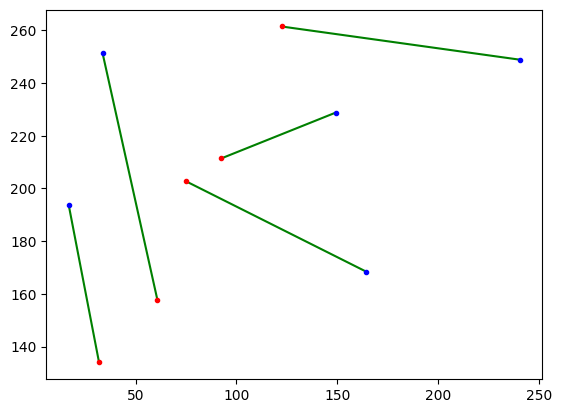

In [147]:
# Plot a green line between pairs of start points (blue) and transformed points (red).|
nPoint = pts1Cart.shape[1]
for cPoint in range(0, nPoint):
    plt.plot([pts1Cart[0,cPoint], pts2Cart[0,cPoint]], [pts1Cart[1,cPoint], pts2Cart[1,cPoint]],'g-')
    plt.plot(pts1Cart[0,cPoint],pts1Cart[1,cPoint],'b.', pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.') 

plt.show()

**Image Explanation**：
This image shows how cartesian points in two sets are related by connecting corresponding points with lines.

## Homography estimation time!

We've formulated our test example; now our goal is to estimate the homography that maps the first set of points to the second set of points.

### ****TO DO****: Fill in the details of these routines (solveAXEqualsZero and calcBestHomography). 

In [148]:
def solveAXEqualsZero(A):
    # TO DO: Write this routine - it should solve Ah = 0. You can do this using SVD. Consult your notes! 
    # Hint: SVD will be involved. 
    U, L , Vt = np.linalg.svd(A) 
    h = Vt[-1, :] #here size of h:(n,) Take last row of V transform
  
    return h

In [149]:
def calcBestHomography(pts1Cart, pts2Cart):
    
    # This function should apply the direct linear transform (DLT) algorithm to calculate the best 
    # homography that maps the cartesian points in pts1Cart to their corresonding matching cartesian poitns 
    # in pts2Cart.
    
    # This function calls solveAXEqualsZero. Make sure you are wary of how to reshape h into a 3 by 3 matrix. 

    n_points = pts1Cart.shape[1]
    
    # TO DO: replace this:
    H = np.identity(3)

    # TO DO: 
    # First convert points into homogeneous representation
    # Hint: we've done this before  in the skeleton code we provide.
    pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
    pts2Hom = np.concatenate((pts2Cart, np.ones((1,pts2Cart.shape[1]))), axis=0)
    # Then construct the matrix A, size (n_points * 2, 9)
    # Consult the notes!
    A = []
    #Each two-dimensional point has the capacity to form two rows within matrix A
    for i in range(n_points):
        x, y = pts1Cart[:,i]
        u, v = pts2Cart[:,i]
        A.append([0, 0, 0, -x, -y, -1, x * v, y * v, v])
        A.append([x, y, 1, 0, 0, 0, -x * u, -y * u, -u])
        
    A = np.array(A)        
        
    #print(A.shape)    
    # Solve Ah = 0 using solveAXEqualsZero and get h.
    h = solveAXEqualsZero(A)

    # Reshape h into the matrix H, values of h go first into rows of H
    H = np.reshape(h, (3, 3))
    
    return H

## Test time!

Time to put it all together. 

Now we need a way of measuring how well our mapping does. To do this we will apply our estimated mapping, `HEst`, to `pts1Cart` and obtain estimated points `pts2EstCart`. We will compare `pts2EstCart` and `pts2Cart` using a sum of squared difference to see how well our solution at least approximates the transformed noisy points `pts2Cart`.

Red points on the plot are the noisy points we observe, `pts2Cart`, and the magenta points are the transformed points, `pts2EstCart`, that we get when we apply our estimated homography on `pts1Cart`. The black lines represent the error between both points; if you've set `noiseLevel` to 0, then `sqDiff` should be 0 and the points should overlap perfectly.

Sqaured difference between pts2Cart and pts2EstCart is: 6.32


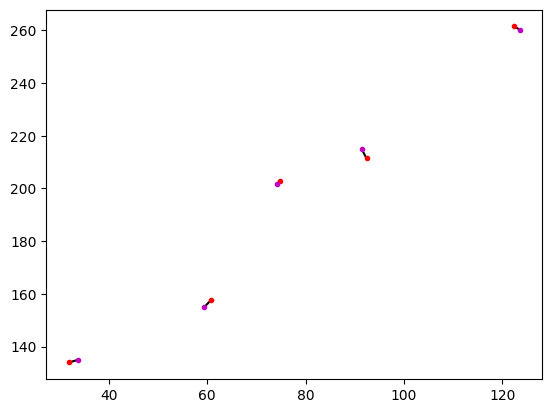

In [150]:
# Replace this with a call to the function calcBestHomography. You'll need to figure out which way around the 
# points go in the function, i.e. which direction this homography transforms points from and to. The ordering 
# is dead simple for now but acts as a simple exercise for what comes in later parts of this practical.
#HEst = np.identity(3)
HEst = calcBestHomography(pts1Cart, pts2Cart)
#print(pts2Cart)

# Apply estimated homography to points
pts2EstHom = np.matmul(HEst,pts1Hom)

# Convert back to Cartesian coordinates
pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts2Cart - pts2EstCart)**2))

print("Sqaured difference between pts2Cart and pts2EstCart is: %.2f" % sqDiff)

# Draw figure with points before and after applying the estimated homography
nPoint = pts1Cart.shape[1]

# Plot a black line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts2Cart[0,cPoint], pts2EstCart[0,cPoint]], [pts2Cart[1,cPoint], pts2EstCart[1,cPoint]],'k-')
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.',pts2EstCart[0,cPoint],pts2EstCart[1,cPoint],'m.') 

plt.show()

**Image Explanation**
This image shows the differences between the given points and their calculated coordinates using homogarphy matrix. The lines connecting corresponding points represent the extent of the discrepancies, with longer lines indicating larger errors in the estimation.

## Other things **** TO DO ****

1: Convince yourself that the homography is ambiguous up to scale (by
multiplying it by a constant factor and showing it does the same thing).
Can you see why this is the case mathematically?

2: Show empirically that your homography routine can EXACTLY map any four points to any
other four points.

Sqaured difference between pts2Cart and pts2EstCart is: 6.32


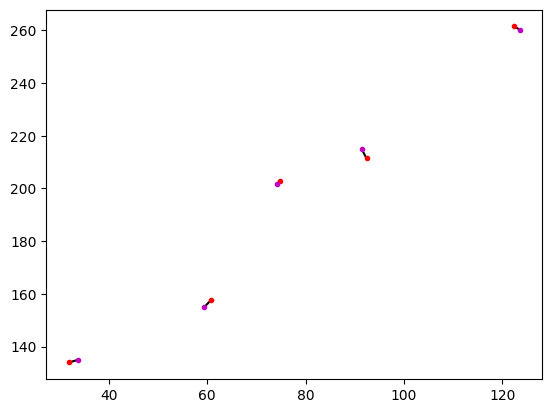

In [151]:
#1
HEst *= 5 # 5 is a scaler factor, we can also use any other number

pts2EstHom = np.matmul(HEst,pts1Hom)

# Convert back to Cartesian coordinates
pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts2Cart - pts2EstCart)**2))

print("Sqaured difference between pts2Cart and pts2EstCart is: %.2f" % sqDiff)

# Draw figure with points before and after applying the estimated homography
nPoint = pts1Cart.shape[1]

# Plot a black line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts2Cart[0,cPoint], pts2EstCart[0,cPoint]], [pts2Cart[1,cPoint], pts2EstCart[1,cPoint]],'k-')
    plt.plot(pts2Cart[0,cPoint],pts2Cart[1,cPoint],'r.',pts2EstCart[0,cPoint],pts2EstCart[1,cPoint],'m.') 

plt.show()



**Image Explanaion**
This image illustrates that after multiplying the homography matrix by a constant, the squared errors I obtained remain unchanged, providing evidence for the scale ambiguity property of the homography matrix. 

**Mathematical Explanation**
The homography matrix describes the projection relationship between two planes. The scale invariance is rooted in the nature of projection transformations. Even when scaling an object on one plane, the relationship of the projection transformation can still be represented by a homography matrix.

The size of homogarphy matrix is 3 by 3, so it has 9 factors. But it only has eight degrees of freedom. The last factor of the homography matrix is a scaler factor. 

Addtionally, homography matrix is commonly employed to describe projective transformations in homogeneous coordinate systems.

The homogeneous coordinate system exhibits scale ambiguity. Multiplying all its elements by a constant still results in no change.





Sqaured difference between pts2Cart and pts2EstCart is: 0.00


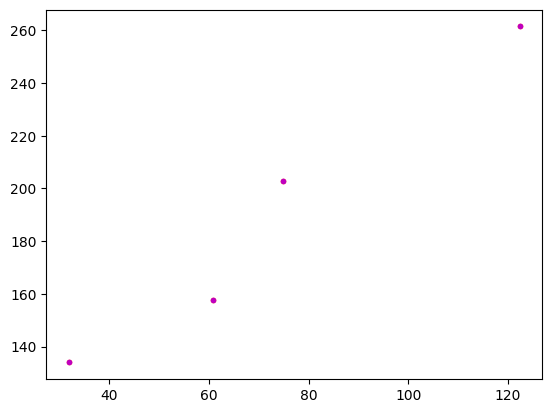

In [154]:
#2
#Remove the last point in pts1Cart and pts2Cart
pts3Cart = pts1Cart[:, :4]
pts4Cart = pts2Cart[:, :4]

pts3Hom = np.concatenate((pts3Cart, np.ones((1,pts3Cart.shape[1]))), axis=0)

HEst = calcBestHomography(pts3Cart, pts4Cart)
#print(pts2Cart)

# Apply estimated homography to points
pts4EstHom = np.matmul(HEst,pts3Hom)

# Convert back to Cartesian coordinates
pts4EstCart = pts4EstHom[0:2,:] / np.tile([pts4EstHom[2,:]],(2,1))

# Calculate the mean squared distance from actual points
sqDiff = np.mean(sum((pts4Cart - pts4EstCart)**2))

print("Sqaured difference between pts2Cart and pts2EstCart is: %.2f" % sqDiff)

# Draw figure with points before and after applying the estimated homography
nPoint = pts3Cart.shape[1]

# Plot a black line between pairs of actual points (red) and estimated points (magenta)
for cPoint in range(0, nPoint):
    plt.plot([pts4Cart[0,cPoint], pts4EstCart[0,cPoint]], [pts4Cart[1,cPoint], pts4EstCart[1,cPoint]],'k-')
    plt.plot(pts4Cart[0,cPoint],pts4Cart[1,cPoint],'r.',pts4EstCart[0,cPoint],pts4EstCart[1,cPoint],'m.') 

plt.show()

**Image Explanation**
From this image, it is evident that when given 4 points, the estimated points perfectly coincide with the provided ground truth values, resulting in zero error. 

**Mathematical Explanation**
The homography matrix has 8 degrees of freedom, and 4 pairs of points can provide 8 equations, employing 4 pairs of points for computation yields a unique solution. 

However, utilizing 5 pairs of known points in the computation introduces redundancy, as it forms 10 equations. Given that a homography matrix has only 8 degrees of freedom, it cannot simultaneously satisfy all 10 equations, leading to the introduction of errors.

